### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

In [86]:
coupons_data = pd.read_csv('data/coupons.csv')

data = pd.read_csv('data/coupons.csv')

In [87]:
coupons_data.head()

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [88]:
# Checking data types
coupons_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [89]:
# Check on the data distribution 
coupons_data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data is very small dataset and it the responses to the coupon is not distributed well. As you see the rejection data is only in 25%

In [90]:
#Find the unique values in each column
for col in coupons_data.columns:
    print(col,"-->",coupons_data[col].unique())

destination --> ['No Urgent Place' 'Home' 'Work']
passanger --> ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather --> ['Sunny' 'Rainy' 'Snowy']
temperature --> [55 80 30]
time --> ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon --> ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration --> ['1d' '2h']
gender --> ['Female' 'Male']
age --> ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus --> ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children --> [1 0]
education --> ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation --> ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Pers

3. Decide what to do about your missing data -- drop, replace, other...

In [91]:
#Finding missing/Null/NaN values
coupons_data.isnull().sum()/coupons_data.shape[0]*100 


destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

##### Car attribute  is missing 99% of data and needs to be removed.
##### Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50 columns have 1% of null records and needs to replaced with 'Nothing'

In [92]:
# Droping the car column
coupons_data=coupons_data.drop('car',axis=1)
coupons_data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [93]:
#check for duplicates
coupons_data.duplicated().value_counts()

False    12610
True        74
dtype: int64

In [95]:
#Remove the duplicates
coupons_data=coupons_data.drop_duplicates()

In [67]:
#Checking the duplicates are removed
coupons_data.duplicated().value_counts()

False    12610
dtype: int64

In [244]:
# Fill NaN/Null with Nothing for the columns "CarryAway","CoffeeHouse","RestaurantLessThan20","Restaurant20To50","Bar"
coupons_data["CarryAway"].fillna("Nothing", inplace=True)
coupons_data["CoffeeHouse"].fillna("Nothing", inplace=True)
coupons_data["RestaurantLessThan20"].fillna("Nothing", inplace=True)
coupons_data["Restaurant20To50"].fillna("Nothing", inplace=True)
coupons_data["Bar"].fillna("Nothing", inplace=True)
# Check if the NaN/Null are removed
coupons_data.isnull().sum()/coupons_data.shape[0]*100 

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
drive_to_coupon         0.0
dtype: float64

In [98]:
# Few of the columns like temperature,income,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
# can be combined
coupons_data['temperature'].value_counts()



80    6475
55    3830
30    2305
Name: temperature, dtype: int64

In [99]:
# temperature
temperature_mapping = {
    55:'Low',
    80:'High', 
    30:'Medium'
};
coupons_data['temperature'] = coupons_data['temperature'].map(temperature_mapping)
coupons_data["temperature"].value_counts() 


High      6475
Low       3830
Medium    2305
Name: temperature, dtype: int64

In [100]:
coupons_data["CarryAway"].value_counts() 

1~3        4645
4~8        4242
less1      1849
gt8        1572
never       152
Nothing     150
Name: CarryAway, dtype: int64

In [102]:
# CarryAway: converting the carryaway arttibute to the average so it can be replaced to a single value 
CarryAway_mapping = {
    'less1': 1,
    '1~3':2,
    '4~8':6, 
    'gt8':9,
    'never':0,
    'Nothing':0
};
coupons_data['CarryAway'] = coupons_data['CarryAway'].map(CarryAway_mapping);
coupons_data["CarryAway"].value_counts() 

2    4645
6    4242
1    1849
9    1572
0     302
Name: CarryAway, dtype: int64

In [103]:
#RestaurantLessThan20 
coupons_data["RestaurantLessThan20"].value_counts() 

1~3        5356
4~8        3553
less1      2071
gt8        1282
never       219
Nothing     129
Name: RestaurantLessThan20, dtype: int64

In [104]:
RestaurantLessThan20_mapping = {
    'less1': 1,
    '1~3':2,
    '4~8':6, 
    'gt8':9,
    'never':0,
    'Nothing':0
};
coupons_data['RestaurantLessThan20'] = coupons_data['RestaurantLessThan20'].map(RestaurantLessThan20_mapping);
coupons_data["RestaurantLessThan20"].value_counts() 

2    5356
6    3553
1    2071
9    1282
0     348
Name: RestaurantLessThan20, dtype: int64

In [105]:
#Restaurant20To50
coupons_data["Restaurant20To50"].value_counts() 


less1      6041
1~3        3266
never      2122
4~8         728
gt8         264
Nothing     189
Name: Restaurant20To50, dtype: int64

In [ ]:
RestaurantLessThan20_mapping = {
    'less1': 1,
    '1~3':2,
    '4~8':6, 
    'gt8':9,
    'never':0,
    'Nothing':0
};

In [107]:
coupons_data['Restaurant20To50'] = coupons_data['Restaurant20To50'].map(RestaurantLessThan20_mapping);
coupons_data["Restaurant20To50"].value_counts() 

1    6041
2    3266
0    2311
6     728
9     264
Name: Restaurant20To50, dtype: int64

In [125]:
# Combine toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min to drive_to_coupon column

def column_to_coupon(col):
    toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min = list(map(str,col))
    if toCoupon_GEQ5min == '1':
        if toCoupon_GEQ15min=='1':
            if toCoupon_GEQ25min=='1':
                return 'within 25mins'
            else:
                return 'within 15mins'
        else:
            return 'within 5mins'
coupons_data['drive_to_coupon'] = coupons_data[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].apply(column_to_coupon,axis=1,raw=True)
coupons_data=coupons_data.drop(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],axis=1)
coupons_data.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'direction_opp', 'Y', 'drive_to_coupon'],
      dtype='object')

4. What proportion of the total observations chose to accept the coupon? 

Accepted percentage 56.75654242664552
Not Accepted 43.24345757335448


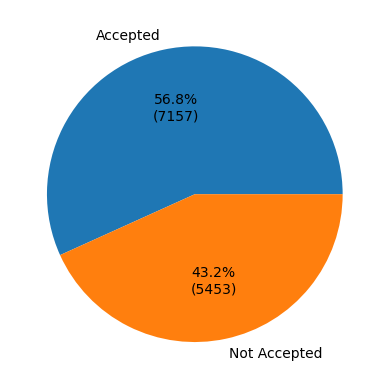

In [208]:
#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
data=coupons_data["Y"].value_counts()
plt.pie(data, labels=['Accepted','Not Accepted'], autopct=autopct_format(data));

print(f"Accepted percentage {coupons_data.query('Y==1')['Y'].count()/coupons_data.shape[0]*100 }")
print(f"Not Accepted {coupons_data.query('Y==0')['Y'].count()/coupons_data.shape[0]*100 }")



#### We have more data  that repesents coupon accepetance there is a possibility of imbalance

5. Use a bar plot to visualize the `coupon` column.

In [198]:
coupons_data_counts = coupons_data[["coupon"]].value_counts().reset_index(name='count')
display(coupons_data_counts)


,coupon,count
0,Coffee House,3989
1,Restaurant(<20),2779
2,Carry out & Take away,2344
3,Bar,2010
4,Restaurant(20-50),1488


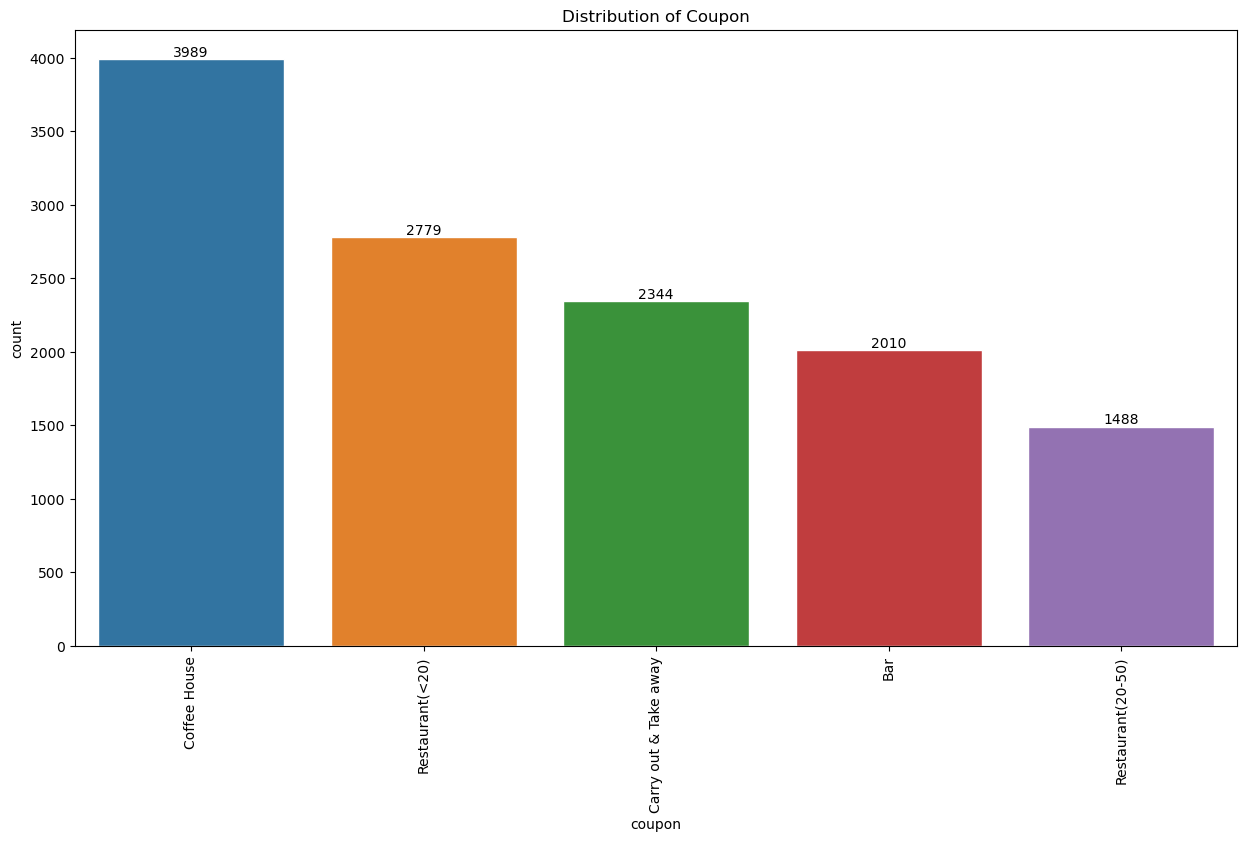

In [199]:
 
f, ax = plt.subplots(figsize = (15,8))
sns.set_color_codes('pastel')
ax=sns.barplot(x = 'coupon', y = 'count', data = coupons_data_counts,
               edgecolor = 'w')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Coupon')
plt.xticks(rotation = 90)
plt.show()

#### 1. Coffee House attribute has the most number of coupons in the dataset.  Restaurant(20-50) arrtibute has the least of the coupons. Data indicates that expensive restaurants  doesn't give out coupons in this dataset.

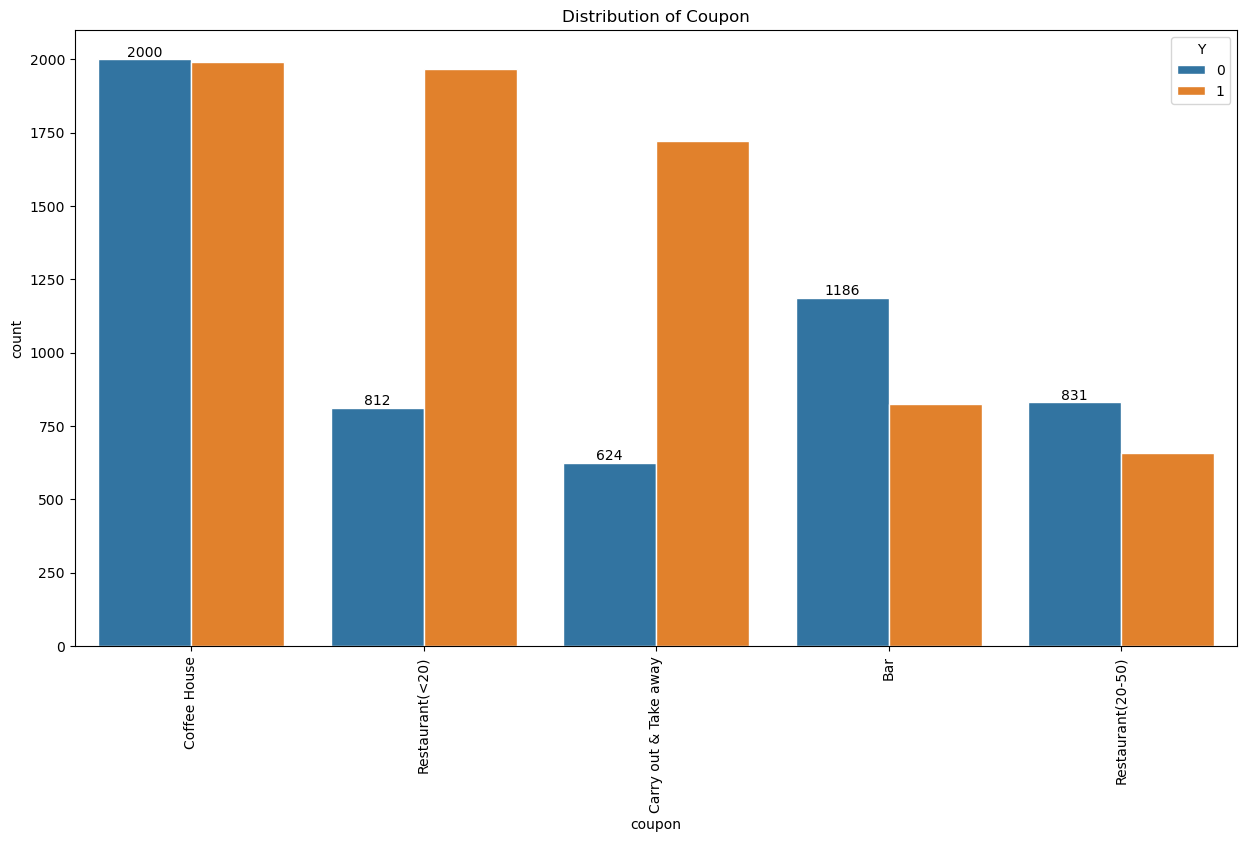

In [200]:
coupons_data_counts = coupons_data[["coupon","Y"]].value_counts().reset_index(name='count')
f, ax = plt.subplots(figsize = (15,8))
sns.set_color_codes('pastel')
ax=sns.barplot(x = 'coupon', y = 'count', data = coupons_data_counts,
               edgecolor = 'w',hue='Y')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Coupon')
plt.xticks(rotation = 90)
plt.show()

##### There is high number of non-acceptance of coupons among Restaurant(20-50). Restaurant(<20) have high percentage of coupon acceptance

6. Use a histogram to visualize the temperature column.

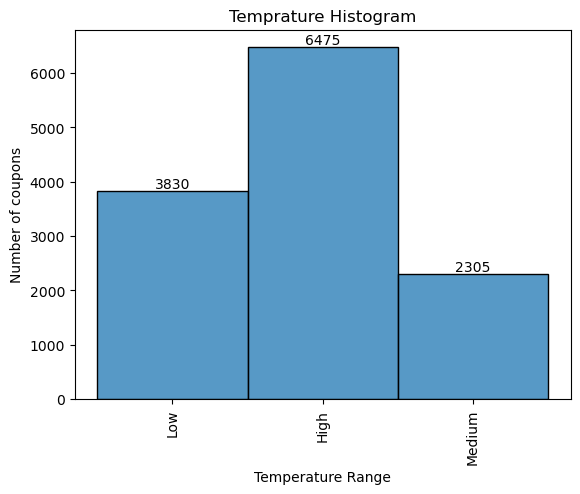

In [214]:
ax=temp_plt = sns.histplot(data=coupons_data["temperature"])
temp_plt.set(title="Temprature Histogram", xlabel="Temperature Range",ylabel='Number of coupons')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()
 



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [309]:
# create a new dataframe by selected only "Bar" coupon data from "Coupon" column
coupons_bar = coupons_data[coupons_data["coupon"] == "Bar"].reset_index()

2. What proportion of bar coupons were accepted?


Accepted percentage for Bar Coupon 40.99502487562189


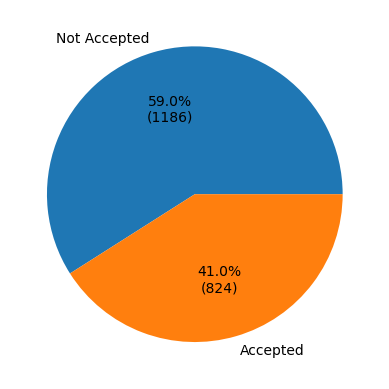

In [415]:
#https://stackoverflow.com/a/71515035/2901002
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
data=coupons_bar["Y"].value_counts()
plt.pie(data, labels=['Not Accepted','Accepted'], autopct=autopct_format(data));
print(f"Accepted percentage for Bar Coupon {coupons_bar.query('Y==1')['Y'].count()/coupons_bar.shape[0]*100 }")
 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [311]:

# We taking the average of the bar field to quatify their frequency
bar_mapping = {
    'less1': 1,
    '1~3':2,
    '4~8':6, 
    'gt8':9,
    'never':0,
    'Nothing':0
}
coupons_bar['Bar'] = coupons_bar['Bar'].map(bar_mapping)

In [417]:
#Bar<=2 & Y==1
#  acceptance rate between those who went to a bar 3 or fewer times a month 
(coupons_bar.query("Bar<=2 & Y==1")['Bar'].count()/coupons_bar['Bar'].count())*100
print(f"Acceptance rate of those who went to a bar 3 or fewer times a month { (coupons_bar.query('Bar<=2 & Y==1')['Bar'].count()/coupons_bar['Bar'].count()) *100 } ")

#  acceptance rate between those who went more than 3 times a month 
(coupons_bar.query("Bar>2 & Y==1")['Bar'].count()/coupons_bar['Bar'].count())*100
print(f"Acceptance rate of those who went more than 3 times a month { (coupons_bar.query('Bar>2 & Y==1')['Bar'].count()/coupons_bar['Bar'].count()) *100 } ")

Acceptance rate of those who went to a bar 3 or fewer times a month 33.38308457711443 
Acceptance rate of those who went more than 3 times a month 7.611940298507462 


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [314]:
#(coupons_bar.query("Bar>=1 & age>25 & Y==1")['Bar'].count()/coupons_bar['Bar'].count())*100
age_mapping = {
    '50plus': 51,
    'below21':20,
    '21':21,
    '26':26,
    '31':31,
    '36':36,
    '36':36,
    '41':41,
    '46':46
}

coupons_bar['age']=coupons_bar['age'].map(age_mapping)


In [365]:
rate_above25=(coupons_bar.query("Bar>1 & Y==1 & age>25")['Bar'].count()/coupons_bar['Bar'].count())*100
print(f" Rate of acceptance for drivers who go to a bar more than once a month and are over the age of 25 :{ rate_above25}")

rate_all = (coupons_bar.query("Y==1")['Bar'].count()- coupons_bar.query("Bar>1 & Y==1 & age>25")['Bar'].count()) /coupons_bar['Bar'].count() *100

print(f" Difference : { rate_all}")


 Rate of acceptance for drivers who go to a bar more than once a month and are over the age of 25 :14.527363184079602
 Difference : 26.46766169154229


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [376]:

ans=coupons_bar.query('passanger !="Kid(s)" & Bar>1 & occupation != "Farming Fishing & Forestry" & Y==1')['Bar'].count()/coupons_bar['Bar'].count()*100
print(f"Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {ans }")
ans_dif= (coupons_bar.query("Y==1")['Bar'].count() - coupons_bar.query('passanger !="Kid(s)" & Bar>1 & occupation != "Farming Fishing & Forestry" & Y==1')['Bar'].count() )
print(f"Difference: {ans_dif/coupons_bar['Bar'].count() *100}")
 

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 19.55223880597015
Difference: 21.442786069651742


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



,Acceptance Rate
"bars>1,Passengers No Kidand Not Widowed",71.324864
bars>1 and Age< 30,72.173913
cheap restaurants>4 and income is less than 50K.,45.756458


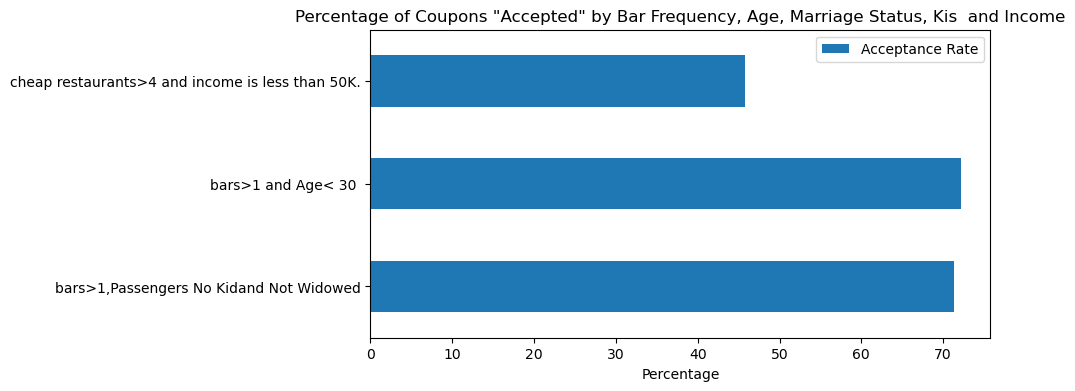

In [416]:
#Bar--> 1
#passanger --> !Kid(s) 
#maritalStatus -->!Widowed
#age<31
#RestaurantLessThan20>4
#income $12500 - $24999,$25000 - $37499,$37500 - $49999


bar_condition =coupons_bar['Bar']> 1
mariage_condition =coupons_bar['maritalStatus']!="Widowed"
passanger_condition=coupons_bar['passanger']!="Kid(s)"
age_condition=coupons_bar['age']<31
restaturant_condition=coupons_bar['RestaurantLessThan20']>4
income_condition=coupons_bar['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999']) 

condition_1_dataframe = coupons_bar[bar_condition & passanger_condition & mariage_condition]
condition_2_dataframe = coupons_bar[bar_condition & age_condition]
condition_3_dataframe = coupons_bar[restaturant_condition & income_condition]
dict_accpt_rate = {
                    
                    'Acceptance Rate' : [(condition_1_dataframe['Y'].mean()*100),(condition_2_dataframe['Y'].mean()*100),(condition_3_dataframe['Y'].mean()*100)]
                    
                   }


accept_rate=pd.DataFrame(dict_accpt_rate,
                                   index=["bars>1,Passengers No Kidand Not Widowed","bars>1 and Age< 30 ","cheap restaurants>4 and income is less than 50K."])
display(accept_rate)

ax = accept_rate.plot(kind='barh', figsize=(8,4))

ax.set_title('Percentage of Coupons "Accepted" by Bar Frequency, Age, Marriage Status, Kis  and Income')
ax.set_xlabel('Percentage')
ax.set_ylabel('')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Following are the hypothesize about drivers who accepted the bar coupons
    - Bar coupon is not the popular among other coupons. It has only 41% accepetance rate
    - Acceptance rate of those who went more than 3 times a month is 7%. It may means that they had bad experience
      with the coupon deals

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### 1) Do people with more income prefer expensive restraunts(Restaurant20To50) with bar coupon?

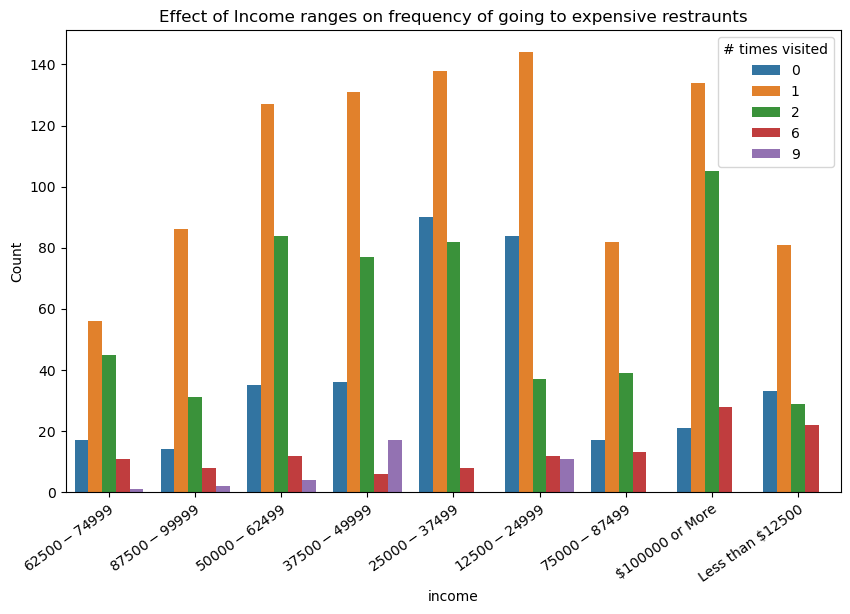

In [443]:

temp = pd.DataFrame(coupons_bar.groupby(['income','Restaurant20To50']).size()).reset_index()
temp.columns = ['income','Restaurant20To50','values']
temp=temp.sort_values(by=['values'])
# plotting
plt.figure(figsize=(10,6))
sns.barplot(x='income',y='values',hue='Restaurant20To50',data=temp)
plt.xticks(rotation = 35,rotation_mode = "anchor",ha = "right")
plt.ylabel("Count")
plt.title("Effect of Income ranges on frequency of going to expensive restraunts")
plt.legend(title="# times visited",loc='upper right')
plt.show()

### ** From the graph above we can infer that most people within the income range above 100K goto expensive resutrants atleast once. People with incode range 37K-49K are highest among nine times or more vists with bar coupons.

### 2) Does age has impact with bar coupon?

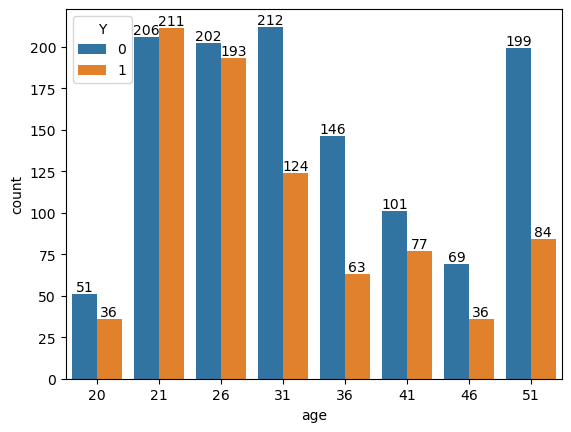

In [449]:
ax=sns.countplot(x='age',data=coupons_bar,hue='Y')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

### From the graph it is evident that people who are above 50 doesn't use the coupon and people who are in the age group 21 have the acceptence rate. Thus the coupon for the bar doesn't seems to be working well as folks are not keen on using coupons for bars